In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
%config InlineBackend.figure_format = "retina"

In [9]:
X, y = make_blobs(n_samples=1000, n_features=3, centers=3, cluster_std=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

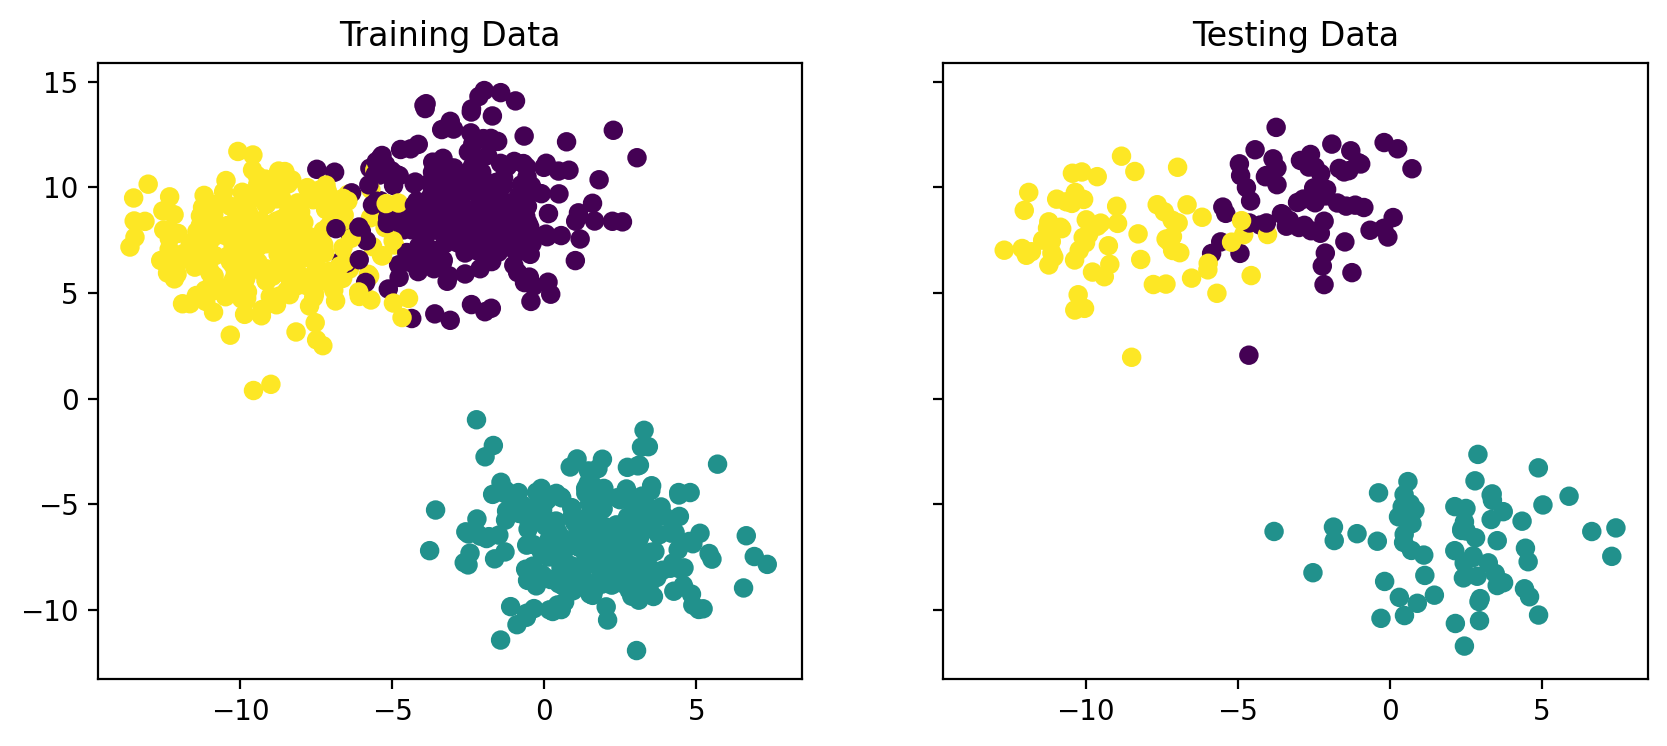

In [11]:
fig, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_title("Training Data")
test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_title("Testing Data")

plt.show()

In [12]:
distances = np.sqrt(np.sum(X_test ** 2, axis=1)[:, None] + np.sum(X_train ** 2, axis=1) - 2 * X_test @ X_train.T)

In [13]:
k = 5
predictions = np.round(np.mean(y_train[np.argsort(distances, axis=1)[:, 0:k]], axis=1))

In [14]:
f1_score(predictions, y_test, average="macro")

0.9444892109064643